### Lab 4

FFT Practice:

Generate and analyze simple vector signals.
Sampled signals and their DFTs.
Removing unwanted tones from an audio signal.
Decoding telephone dialing signals using DFT.
Spectrogram Construction:

Create spectrograms for telephone signals, music, and speech.
Analyze differences in frequency content over time.
Important Points:
Understanding the DFT and its inverse.
Using FFT and IFFT commands in MATLAB.
Creating and interpreting spectrograms.
Practical applications like removing noise from audio and decoding DTMF signals.

1. Simple Vector Signals

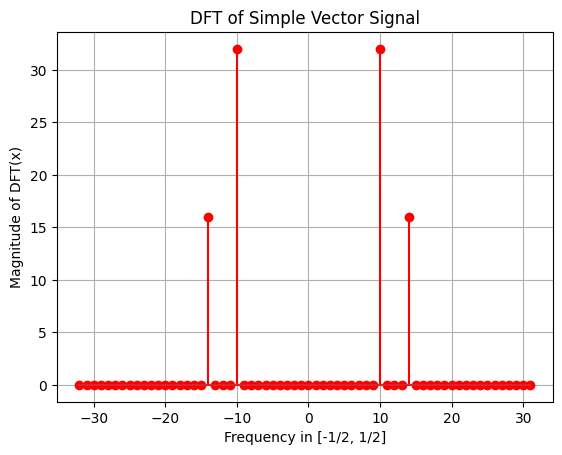

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simple_vector_signals():
    n = 64
    omega1 = 10 * (2 * np.pi / n)
    omega2 = 14 * (2 * np.pi / n)
    k = np.arange(n)
    x = np.cos(omega1 * k) + 0.5 * np.cos(omega2 * k)
    
    hx = np.fft.fft(x)
    shx = np.fft.fftshift(hx)
    
    f = np.fft.fftfreq(n, d=1/n)
    f = np.fft.fftshift(f)
    
    plt.figure()
    plt.stem(f, np.abs(shx), 'r')
    plt.xlabel('Frequency in [-1/2, 1/2]')
    plt.ylabel('Magnitude of DFT(x)')
    plt.title('DFT of Simple Vector Signal')
    plt.grid()
    plt.show()

simple_vector_signals()


2. Simple Sampled Signals

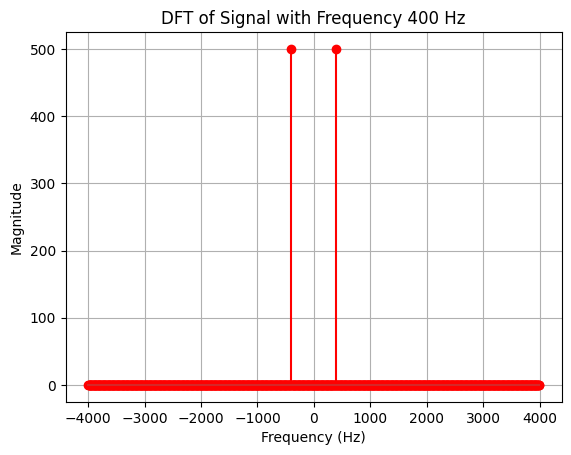

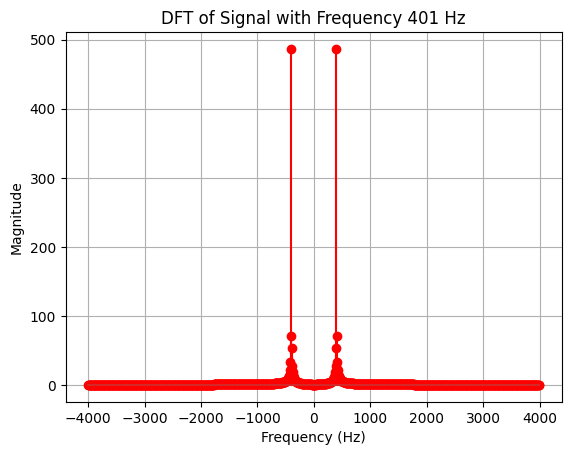

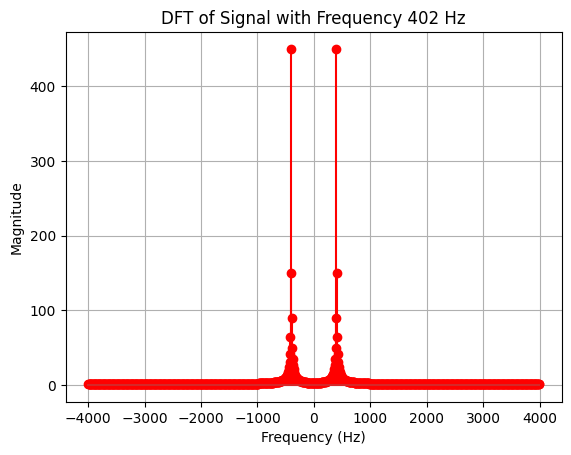

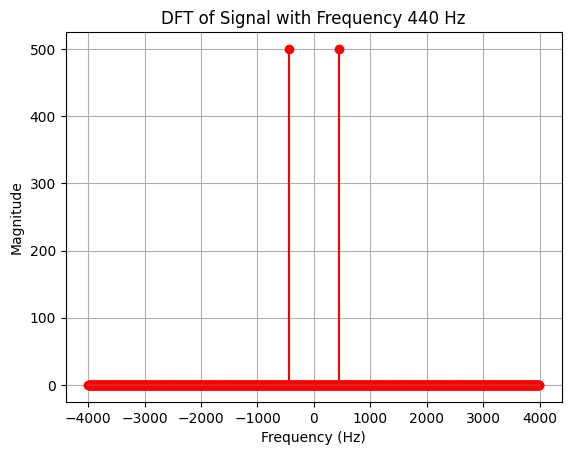

In [2]:
def sampled_signals():
    fs = 8000
    t = np.arange(1000) / fs
    freqs = [400, 401, 402, 440]
    
    for f in freqs:
        x = np.sin(2 * np.pi * f * t)
        hx = np.fft.fft(x, n=1000)
        shx = np.fft.fftshift(hx)
        fHz = np.fft.fftfreq(len(shx), d=1/fs)
        fHz = np.fft.fftshift(fHz)
        
        plt.figure()
        plt.stem(fHz, np.abs(shx), 'r')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.title(f'DFT of Signal with Frequency {f} Hz')
        plt.grid()
        plt.show()

sampled_signals()


3. Removing Unwanted Tones

In [13]:
import scipy.io.wavfile as wav

def remove_unwanted_tones():
    fs, data = wav.read('PinkPanther60.wav')
    hx = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(hx), d=1/fs)
    
    # List the tone frequencies here:
    tones_to_remove = [400, 800]  # Example frequencies to remove
    
    for tone in tones_to_remove:
        idx = np.where((freqs >= tone - 5) & (freqs <= tone + 5))
        hx[idx] = 0
    
    filtered_data = np.fft.ifft(hx).real
    wav.write('filtered_PinkPanther60.wav', fs, filtered_data.astype(np.int16))
    
    print("Filtered audio saved as 'filtered_PinkPanther60.wav'")

remove_unwanted_tones()


Filtered audio saved as 'filtered_PinkPanther60.wav'


4. Spectrogram Construction

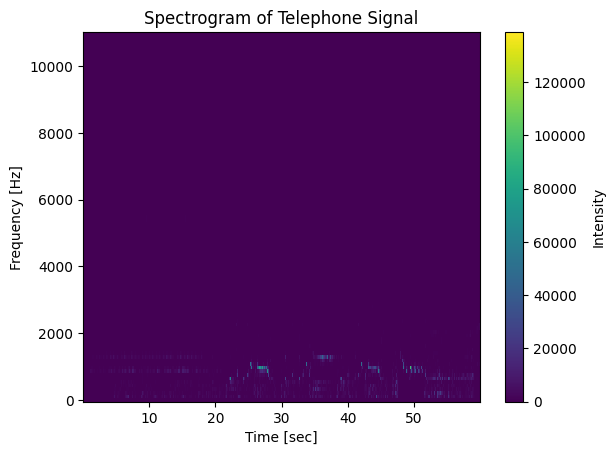

In [12]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def spectrogram_signal():
    fs, data = wav.read('PinkPanther60.wav')
    f, t, Sxx = spectrogram(data, fs, nperseg=205)
    
    plt.figure()
    plt.pcolormesh(t, f, np.abs(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram of Telephone Signal')
    plt.colorbar(label='Intensity')
    plt.show()

spectrogram_signal()


In [7]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 44100  # Sample rate
duration = 5  # Duration of recording in seconds

print("Recording...")
audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

write('tel.wav', fs, audio)  # Save as WAV file


Recording...
Recording finished.
